In [58]:
# Filtering out the warnings

import warnings

warnings.filterwarnings('ignore')

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
#Checking the missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

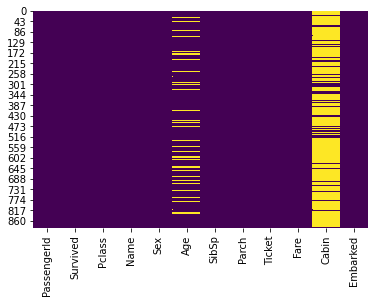

In [6]:
# plot the heat map of null values
sns.heatmap(df.isnull(), cmap = 'viridis', cbar=False)

In [7]:
# Data Cleaning
df['Cabin'] = df.Cabin.apply(lambda x: 0 if x == np.nan else 1)
df.Cabin.head()

0    1
1    1
2    1
3    1
4    1
Name: Cabin, dtype: int64

In [8]:
df.Embarked.fillna('S', inplace = True) 

In [9]:
df.Age.median()

28.0

In [10]:
df.Age.fillna(28.0, inplace = True)
df.Age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [11]:
# imputed all the null values
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [12]:
# Adding Sibling spouse 'SiSp' and Parent children 'Parch' to create family size
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

In [13]:
# for the person who is travelling alone we create a new column, 0 not alone 1 shows alone
df['Alone'] = df.FamilySize.apply(lambda x: 1 if x == 1 else 0)
df.Alone.head()

0    0
1    0
2    1
3    0
4    1
Name: Alone, dtype: int64

In [14]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,1,S,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1,C,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,1,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,1,S,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,1,S,1,1


In [17]:
# some have very high fare and some have low fare so we split the values into categories
df['CategoricalFare'] = pd.qcut(df['Fare'], 4, labels = [0, 1, 2, 3]).astype(int)

In [21]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Alone,CategoricalFare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,1,S,2,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1,C,2,0,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,1,S,1,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,1,S,2,0,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,1,S,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,1,S,1,1,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,1,S,1,1,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,1,S,4,0,2
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,1,C,1,1,2


In [22]:
# Categorize the age column
df['CategoricalAge'] = pd.cut(df['Age'], 5, labels = [0, 1, 2, 3, 4]).astype(int)

In [28]:
# convert gender column to numerical 0 or 1 so the machine can understand
df.Sex = df.Sex.apply(lambda x: 1 if x == 'male' else 0)

In [31]:
# now the data cleaning is done we should drop the unwanted columns
df.drop(['SibSp', 'Parch', 'PassengerId', 'Ticket', 'Cabin'], axis = 1, inplace = True)

In [32]:
df

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,FamilySize,Alone,CategoricalFare,CategoricalAge
0,0,3,"Braund, Mr. Owen Harris",1,22.0,7.2500,S,2,0,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,71.2833,C,2,0,3,2
2,1,3,"Heikkinen, Miss. Laina",0,26.0,7.9250,S,1,1,1,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,53.1000,S,2,0,3,2
4,0,3,"Allen, Mr. William Henry",1,35.0,8.0500,S,1,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",1,27.0,13.0000,S,1,1,1,1
887,1,1,"Graham, Miss. Margaret Edith",0,19.0,30.0000,S,1,1,2,1
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,28.0,23.4500,S,4,0,2,1
889,1,1,"Behr, Mr. Karl Howell",1,26.0,30.0000,C,1,1,2,1


In [33]:
# correlation study to find the positive and negative correlation
df.corr()

,Survived,Pclass,Sex,Age,Fare,FamilySize,Alone,CategoricalFare,CategoricalAge
Survived,1.000000,-0.338481,-0.543351,-0.064910,0.257307,0.016639,-0.203367,0.299357,-0.043800
Pclass,-0.338481,1.000000,0.131900,-0.339898,-0.549500,0.065997,0.135207,-0.634271,-0.358769
Sex,-0.543351,0.131900,1.000000,0.081163,-0.182333,-0.200988,0.303646,-0.243613,0.070220
Age,-0.064910,-0.339898,0.081163,1.000000,0.096688,-0.245619,0.171647,0.084434,0.939139
Fare,0.257307,-0.549500,-0.182333,0.096688,1.000000,0.217138,-0.271832,0.579345,0.123640
FamilySize,0.016639,0.065997,-0.200988,-0.245619,0.217138,1.000000,-0.690922,0.465396,-0.217063
Alone,-0.203367,0.135207,0.303646,0.171647,-0.271832,-0.690922,1.000000,-0.560279,0.123981
CategoricalFare,0.299357,-0.634271,-0.243613,0.084434,0.579345,0.465396,-0.560279,1.000000,0.100443
CategoricalAge,-0.043800,-0.358769,0.070220,0.939139,0.123640,-0.217063,0.123981,0.100443,1.000000


<AxesSubplot:>

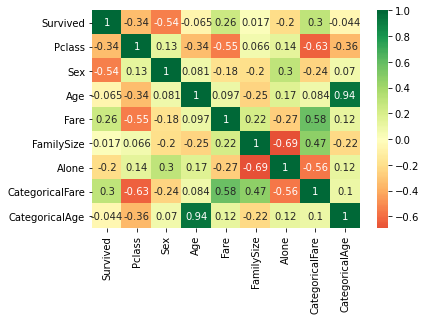

In [36]:
# plot a heatmap for better understanding (Survived column is the target column to find correlation)
sns.heatmap(df.corr(), cmap = 'RdYlGn', annot = True, center = 0)

In [37]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

C:\Users\Sudeep Dwivedi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


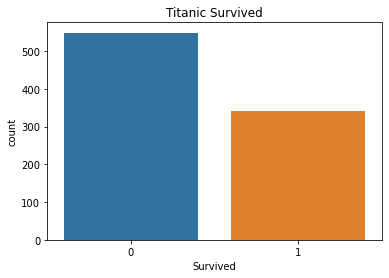

In [47]:
sns.countplot('Survived', data=df)
plt.title("Titanic Survived")
plt.show()

<AxesSubplot:ylabel='Survived'>

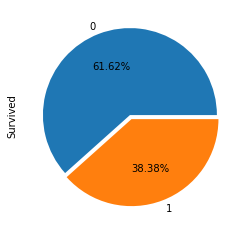

In [49]:
# find the percentage of survived passengers
explode = [0, 0.05]
df['Survived'].value_counts().plot.pie(autopct = '%1.2f%%', explode=explode)

<AxesSubplot:xlabel='Sex'>

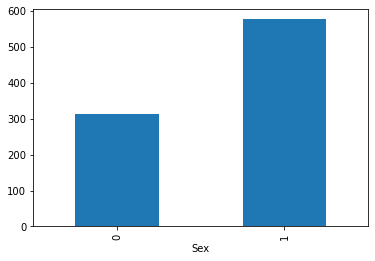

In [57]:
# how many males and females survived
df.groupby('Sex')['Survived'].count().plot.bar()

In [59]:
df.head()

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,FamilySize,Alone,CategoricalFare,CategoricalAge
0,0,3,"Braund, Mr. Owen Harris",1,22.0,7.2500,S,2,0,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,71.2833,C,2,0,3,2
2,1,3,"Heikkinen, Miss. Laina",0,26.0,7.9250,S,1,1,1,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,53.1000,S,2,0,3,2
4,0,3,"Allen, Mr. William Henry",1,35.0,8.0500,S,1,1,1,2


<AxesSubplot:xlabel='Age'>

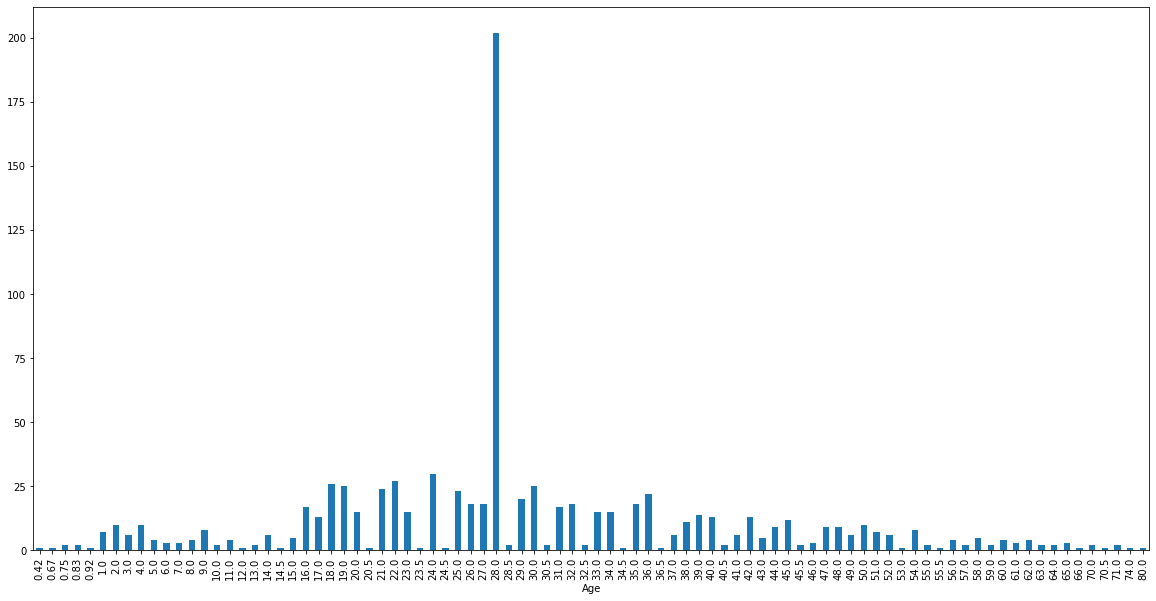

In [70]:
# Age vs survived
plt.figure(figsize = (20,10))
df.groupby('Age')['Survived'].count().plot.bar('Survived')

In [72]:
# so we can see that passengers with age 28 had the most suvival rate